In [52]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [53]:
import tensorflow as tf
from tensorflow import keras

In [3]:
# use dataset from https://github.com/alexeygrigorev/clothing-dataset-small in project root

## 8.2 TensorFlow and Keras

In [4]:
from tensorflow.keras.preprocessing.image import load_img

In [59]:
file_path = "../../clothing-dataset-small/train/t-shirt/5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg"
# Neural network expects image of certain size (usually 299^2, 224^2 or 150^2)
img = load_img(file_path, target_size=(299, 299))
# Uses PIL
# IMG consists is an array that has 3 channels (R, G, B) - each channel contains a representation of pixels with the appropriate value from this channel
# Images are encoded internally - array of image size and 3 channels - e.g. (150, 150, 3)
# Can transform PIL image into Numpy array, where each row is a pixel - [[[177 169  97], and we have 15 of them
x = np.array(img)
print(x.shape)
print(x)

(299, 299, 3)
[[[179 171  99]
  [179 171  99]
  [181 173 101]
  ...
  [251 253 248]
  [251 253 248]
  [251 253 248]]

 [[188 179 110]
  [187 178 109]
  [186 177 108]
  ...
  [251 252 247]
  [251 252 247]
  [251 252 246]]

 [[199 189 127]
  [200 190 128]
  [200 190 128]
  ...
  [250 251 245]
  [250 251 245]
  [250 251 245]]

 ...

 [[165 151  76]
  [173 159  84]
  [171 157  82]
  ...
  [183 135  24]
  [181 133  22]
  [183 135  24]]

 [[165 151  76]
  [173 159  84]
  [171 157  82]
  ...
  [182 134  23]
  [180 132  21]
  [182 134  23]]

 [[165 151  76]
  [173 159  84]
  [171 157  82]
  ...
  [181 133  22]
  [179 131  20]
  [182 134  23]]]


## 8.3 Pre-trained convolutional neural networks
- Imagenet dataset: https://www.image-net.org/
- Pre-trained models: https://keras.io/api/applications/
- Using SaturnCloud for running models in cloud - with GPU

In [6]:
from tensorflow.keras.applications.xception import (
    Xception,
    decode_predictions,
    preprocess_input,
)

In [7]:
model = Xception(weights="imagenet", input_shape=(299, 299, 3))

2023-11-12 20:14:53.748207: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-12 20:14:53.768304: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-12 20:14:53.768643: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-12 20:14:53.769189: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [8]:
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [9]:
# Always need to use `preprocess_input`
X = preprocess_input(X)
X[0]

array([[[ 0.4039216 ,  0.3411765 , -0.2235294 ],
        [ 0.4039216 ,  0.3411765 , -0.2235294 ],
        [ 0.41960788,  0.35686278, -0.20784312],
        ...,
        [ 0.96862745,  0.9843137 ,  0.94509804],
        [ 0.96862745,  0.9843137 ,  0.94509804],
        [ 0.96862745,  0.9843137 ,  0.94509804]],

       [[ 0.47450984,  0.4039216 , -0.1372549 ],
        [ 0.4666667 ,  0.39607847, -0.14509803],
        [ 0.45882356,  0.38823533, -0.15294117],
        ...,
        [ 0.96862745,  0.9764706 ,  0.9372549 ],
        [ 0.96862745,  0.9764706 ,  0.9372549 ],
        [ 0.96862745,  0.9764706 ,  0.92941177]],

       [[ 0.56078434,  0.48235297, -0.00392157],
        [ 0.5686275 ,  0.4901961 ,  0.00392163],
        [ 0.5686275 ,  0.4901961 ,  0.00392163],
        ...,
        [ 0.9607843 ,  0.96862745,  0.92156863],
        [ 0.9607843 ,  0.96862745,  0.92156863],
        [ 0.9607843 ,  0.96862745,  0.92156863]],

       ...,

       [[ 0.2941177 ,  0.18431377, -0.40392154],
        [ 0

In [10]:
pred = model.predict(X)
pred.shape

2023-11-12 20:14:57.132522: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-11-12 20:14:57.757149: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-12 20:14:57.758062: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-12 20:14:57.758101: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-11-12 20:14:57.759021: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-12 20:14:57.759095: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1/1 [==============================] - 3s 3s/step


(1, 1000)

In [11]:
decode_predictions(pred)

[[('n03595614', 'jersey', 0.6792451),
  ('n02916936', 'bulletproof_vest', 0.03960026),
  ('n04370456', 'sweatshirt', 0.035299566),
  ('n03710637', 'maillot', 0.010884127),
  ('n04525038', 'velvet', 0.0018057587)]]

## 8.4. Convolutional neural networks
- Types of layers
- Convolutional layers and filters
- Dense layers
- Mostly used for images
  
There are more layers, read: https://cs231n.github.io


1. Convolutional (role - extract vector representation of the image)
   Consists of filters, small images,e.g. 5x5. Contains simple shapes, lines.
   Everytime the filters i applied we slide the filter across the image - and calculate similarity between the filter and the image. - We get Feature map where highher value in a "cell" means higher similarity with the filter.
   Input - image, output - feature maps (one for each filter).
   Ouptut of 1st convolutional layer is a set of feature map. 
   Then we use this as an image to the 2nd convolutional layer.
   .. could be more convolutional layers and each chained actions (layer , filters, feature maps) learns more complex filters.

   Filters are "learned" during training.
   e.g. 3 layers
   1st layer learns simple filters (e.g. simple shapes)
   2nd layer learns more complex shapes (by combining filters from previous layers)
   3rd layer learns even more complex shapes
   Finaly, there's a vectore representation that' s ready to be used in dense layer
2. Dense layers (role - make final prediction)
   Dense - because each elem of input connects to each elem of output.
   So it's essentially matrix multiplication
   E.g. if we want to predict if image is a t-shirt, dress or jeans, we could use Logistic regression.
   Multiplicating the iumage vector values xi with the specific class weights wj.
   Possible to combine multiple dense layers

* Pooling layer 
  Takes feature map that one of Convolutional layers learned and it makes it smaller. Forcing it to have fewer parameters.
  E.g. if feature map os 200x200, after pooling it could be 100x100.



## 8.5. Transfer learning
- Reading data with ImageDataGenerator
- Train `Xception` on smaller images (150x150)
- Better run this on GPU (using Saturn Cloud)


- Transforming Image to Vector and learning the filters is quite generic, no need to change that
- Specific to the ImageNet dataset  - dense layers
- So we keep the convolutional layers but train new dense layers (the idea behind transfer learning)


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [14]:
train_ds = train_gen.flow_from_directory(
    "../../clothing-dataset-small/train",
    target_size=(150, 150),
    batch_size=32,
)

Found 3068 images belonging to 10 classes.


In [15]:
!ls -l ../../clothing-dataset-small/train

total 248
drwxr-sr-x 2 jovyan jovyan 20480 Nov 12 20:12 dress
drwxr-sr-x 2 jovyan jovyan 12288 Nov 12 20:12 hat
drwxr-sr-x 2 jovyan jovyan 36864 Nov 12 20:12 longsleeve
drwxr-sr-x 2 jovyan jovyan 20480 Nov 12 20:12 outwear
drwxr-sr-x 2 jovyan jovyan 36864 Nov 12 20:12 pants
drwxr-sr-x 2 jovyan jovyan 20480 Nov 12 20:12 shirt
drwxr-sr-x 2 jovyan jovyan 20480 Nov 12 20:12 shoes
drwxr-sr-x 2 jovyan jovyan 20480 Nov 12 20:12 shorts
drwxr-sr-x 2 jovyan jovyan 12288 Nov 12 20:12 skirt
drwxr-sr-x 2 jovyan jovyan 53248 Nov 12 20:12 t-shirt


In [16]:
# class names are inferred from folder names
#  e.g. everything inside t-shirt folder was put under 't-shirt' class
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [17]:
X, y = next(train_ds)

In [18]:
y[
    :5
]  # E.g. last column represents t-shirt, using one-hot encoding for multiclass classification

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [19]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_ds = val_gen.flow_from_directory(
    "../../clothing-dataset-small/validation",
    target_size=(150, 150),
    batch_size=32,
    shuffle=False,
)

Found 341 images belonging to 10 classes.


In [20]:
# base model will be the convolutional layer
# we will train custom model on top of that
## include_top=False - in Keras mentally arrange the visual represenation of deep learning from bottom to top,
# where bottom - convolutional layer and top - dense layer and prediction
base_model = Xception(
    weights="imagenet",
    include_top=False,
    input_shape=(150, 150, 3),
)

# trainable = False - meaning when we train our model, we don't want to change convolutional layers
base_model.trainable = False

In [21]:
# base model will be the convolutional layer
# we will train custom model on top of that
## include_top=False - in Keras mentally arrange the visual represenation of deep learning from bottom to top,
# where bottom - convolutional layer and top - dense layer and prediction
base_model = Xception(
    weights="imagenet",
    include_top=False,
    input_shape=(150, 150, 3),
)

# trainable = False, together with training=False  - meaning when we train our model, we don't want to change convolutional layers
base_model.trainable = False


## Creating a new top

inputs = keras.Input(shape=(150, 150, 3))

# Not enough to provide trainable=False
base = base_model(inputs, training=False)

# Averages out a single filter (5x5) to a single value ,so we can get a vector repr of an image
vectors = keras.layers.GlobalAveragePooling2D()(base)

# Dimensionality is 10, because we have 10 classes
outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [22]:
preds = model.predict(X)
preds.shape

1/1 [==============================] - 1s 1s/step


(32, 10)

In [23]:
# optimizer - calculates weights by checking whether chaneg in wiegth leads to better outcome (by evaluating 'loss')
# there are different optimizers

learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

In [27]:
model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

In [28]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 16s 149ms/step - loss: 1.1730 - accuracy: 0.6692 - val_loss: 1.2814 - val_accuracy: 0.6804
Epoch 2/10
96/96 [==============================] - 12s 126ms/step - loss: 0.5949 - accuracy: 0.8142 - val_loss: 0.8695 - val_accuracy: 0.7801
Epoch 3/10
96/96 [==============================] - 12s 127ms/step - loss: 0.3839 - accuracy: 0.8752 - val_loss: 0.8471 - val_accuracy: 0.7947
Epoch 4/10
96/96 [==============================] - 12s 127ms/step - loss: 0.2240 - accuracy: 0.9192 - val_loss: 0.9470 - val_accuracy: 0.7742
Epoch 5/10
96/96 [==============================] - 12s 128ms/step - loss: 0.1595 - accuracy: 0.9446 - val_loss: 0.8502 - val_accuracy: 0.7977
Epoch 6/10
96/96 [==============================] - 12s 126ms/step - loss: 0.1594 - accuracy: 0.9439 - val_loss: 0.9423 - val_accuracy: 0.7742
Epoch 7/10
96/96 [==============================] - 12s 127ms/step - loss: 0.0875 - accuracy: 0.9694 - val_loss: 0.9670 - val_accuracy: 0.8006

## 8.6. Adjusting the learning rate
- what' s the learning rate
- trying different values


In [29]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights="imagenet",
        include_top=False,
        input_shape=(150, 150, 3),
    )

    # trainable = False, together with training=False  - meaning when we train our model, we don't want to change convolutional layers
    base_model.trainable = False


    ## Creating a new top
    ############################################
    # Create architecture
    inputs = keras.Input(shape=(150, 150, 3))
    # Not enough to provide trainable=False
    base = base_model(inputs, training=False)
    # Averages out a single filter (5x5) to a single value ,so we can get a vector repr of an image
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    # Dimensionality is 10, because we have 10 classes
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)

    ############################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])    
    
    return model

In [30]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)
    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=4, validation_data=val_ds)
    scores[lr] = history.history
    print()
    print()    

0.0001
Epoch 1/4
96/96 [==============================] - 15s 135ms/step - loss: 1.9938 - accuracy: 0.3396 - val_loss: 1.6383 - val_accuracy: 0.4751
Epoch 2/4
96/96 [==============================] - 12s 126ms/step - loss: 1.4304 - accuracy: 0.5486 - val_loss: 1.2739 - val_accuracy: 0.6129
Epoch 3/4
96/96 [==============================] - 12s 126ms/step - loss: 1.1743 - accuracy: 0.6219 - val_loss: 1.0842 - val_accuracy: 0.6774
Epoch 4/4
96/96 [==============================] - 12s 126ms/step - loss: 1.0247 - accuracy: 0.6747 - val_loss: 0.9670 - val_accuracy: 0.7155


0.001
Epoch 1/4
96/96 [==============================] - 15s 136ms/step - loss: 1.0660 - accuracy: 0.6457 - val_loss: 0.7295 - val_accuracy: 0.7742
Epoch 2/4
96/96 [==============================] - 12s 126ms/step - loss: 0.6332 - accuracy: 0.7862 - val_loss: 0.6176 - val_accuracy: 0.8152
Epoch 3/4
96/96 [==============================] - 12s 127ms/step - loss: 0.5013 - accuracy: 0.8321 - val_loss: 0.5926 - val_accuracy

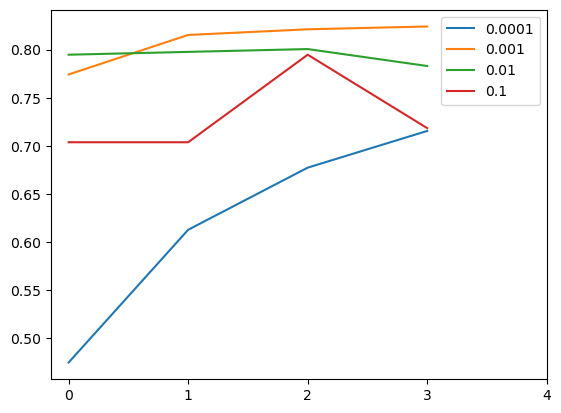

In [37]:
for lr, hist in scores.items():
    plt.plot(hist["val_accuracy"], label=lr)
plt.xticks(np.arange(5))
plt.legend()

In [38]:
del scores[0.0001]
del scores[0.1]

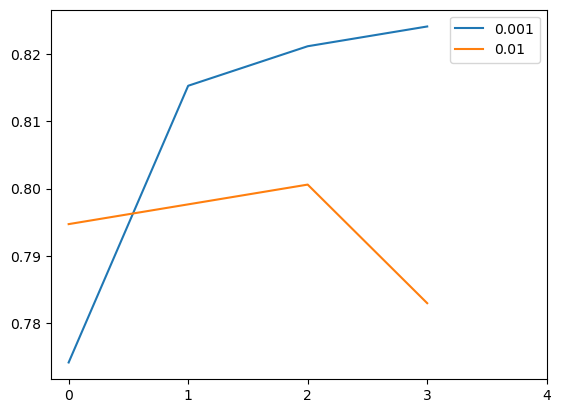

In [39]:
for lr, hist in scores.items():
    plt.plot(hist["val_accuracy"], label=lr)
plt.xticks(np.arange(5))
plt.legend()

In [ ]:
# best learning rate 0.001
learning_rate = 0.001

## 8.7. Checkpointing
- saving the best model only
- training a model with callbacks


In [41]:
# h5 - keras type of bin file to save weights
model.save_weights("model_v1.h5", save_format="h5")


In [45]:
# mode=max because we want the accuracy to be as high as posible
# if we would evaluate loss - we would want for it to be as low as possible
checkpoint = keras.callbacks.ModelCheckpoint(
    "xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5",
    monitor="val_accuracy",
    save_best_only=True,
    mode="max"
)
    

In [47]:
learning_rate = 0.001 

model = make_model(learning_rate=lr)
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[checkpoint],
)

Epoch 1/10
96/96 [==============================] - 16s 147ms/step - loss: 1.2606 - accuracy: 0.6763 - val_loss: 0.9133 - val_accuracy: 0.7566
Epoch 2/10
96/96 [==============================] - 13s 136ms/step - loss: 0.5684 - accuracy: 0.8217 - val_loss: 0.7906 - val_accuracy: 0.8035
Epoch 3/10
96/96 [==============================] - 13s 133ms/step - loss: 0.3250 - accuracy: 0.8862 - val_loss: 0.8400 - val_accuracy: 0.7859
Epoch 4/10
96/96 [==============================] - 13s 137ms/step - loss: 0.2422 - accuracy: 0.9153 - val_loss: 0.8165 - val_accuracy: 0.8065
Epoch 5/10
96/96 [==============================] - 13s 133ms/step - loss: 0.1587 - accuracy: 0.9413 - val_loss: 0.8000 - val_accuracy: 0.8006
Epoch 6/10
96/96 [==============================] - 13s 136ms/step - loss: 0.1191 - accuracy: 0.9576 - val_loss: 0.8228 - val_accuracy: 0.8240
Epoch 7/10
96/96 [==============================] - 13s 132ms/step - loss: 0.0635 - accuracy: 0.9817 - val_loss: 0.8583 - val_accuracy: 0.8035

## 8.8. Adding more layers
- adding one inner dense layer
- experimenting with different sizes of inner layer
- activation - some form of postprocessing of the output vector
- need to use acivation fucntion for intermediate inner layers (we have laready used other acivation functions - sigmoid, softmwax)

In [48]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights="imagenet",
        include_top=False,
        input_shape=(150, 150, 3),
    )

    # trainable = False, together with training=False  - meaning when we train our model, we don't want to change convolutional layers
    base_model.trainable = False


    ## Creating a new top
    ############################################
    # Create architecture
    inputs = keras.Input(shape=(150, 150, 3))
    # Not enough to provide trainable=False
    base = base_model(inputs, training=False)
    # Averages out a single filter (5x5) to a single value ,so we can get a vector repr of an image
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation="relu")(vectors)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)

    ############################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])    
    
    return model

In [60]:
learning_rate = 0.001 
scores = {}

for lr in [10, 100, 1000]:
    print(lr)
    model = make_model(learning_rate=learning_rate, size_inner=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history
    print()
    print()    

10
Epoch 1/10
96/96 [==============================] - 16s 146ms/step - loss: 1.0821 - accuracy: 0.6379 - val_loss: 0.6873 - val_accuracy: 0.7977
Epoch 2/10
96/96 [==============================] - 13s 133ms/step - loss: 0.6255 - accuracy: 0.7859 - val_loss: 0.6243 - val_accuracy: 0.7947
Epoch 3/10
96/96 [==============================] - 13s 133ms/step - loss: 0.5016 - accuracy: 0.8321 - val_loss: 0.5655 - val_accuracy: 0.8240
Epoch 4/10
96/96 [==============================] - 13s 135ms/step - loss: 0.4259 - accuracy: 0.8625 - val_loss: 0.5714 - val_accuracy: 0.8270
Epoch 5/10
96/96 [==============================] - 13s 135ms/step - loss: 0.3756 - accuracy: 0.8849 - val_loss: 0.5321 - val_accuracy: 0.8299
Epoch 6/10
96/96 [==============================] - 13s 134ms/step - loss: 0.3256 - accuracy: 0.9097 - val_loss: 0.5382 - val_accuracy: 0.8240
Epoch 7/10
96/96 [==============================] - 13s 135ms/step - loss: 0.2884 - accuracy: 0.9231 - val_loss: 0.5211 - val_accuracy: 0.8

[]

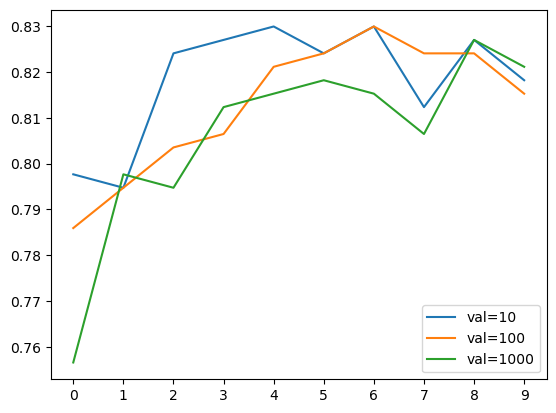

In [63]:
for size, hist in scores.items():
    plt.plot(hist["val_accuracy"], label=("val=%s" % size))
plt.xticks(np.arange(10))
# plt.yticks([])

plt.legend()
plt.plot()

## 8.9. Regularization and Dropout
- Regularizing by freezing a part of the network
- Adding dropout to our model
- Randomly freeze a part of thenetwork ( inner layer), effectively hiding a part of the input (image) and forcing model to focus on bigger picture
- e.g. foxus on recognizing shapenot specific feautre of the image (distinguish t-shirt shape, not a logo on a specific t-shirt)
- Experimenting with different values

In [64]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights="imagenet",
        include_top=False,
        input_shape=(150, 150, 3),
    )

    # trainable = False, together with training=False  - meaning when we train our model, we don't want to change convolutional layers
    base_model.trainable = False


    ## Creating a new top
    ############################################
    # Create architecture
    inputs = keras.Input(shape=(150, 150, 3))
    # Not enough to provide trainable=False
    base = base_model(inputs, training=False)
    # Averages out a single filter (5x5) to a single value ,so we can get a vector repr of an image
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation="relu")(vectors)
    
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs, outputs)

    ############################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])    
    
    return model

In [69]:
learning_rate = 0.001 
size_inner = 100

scores = {}

# for droprate in [0.0, 0.2, 0.5, 0.8]:
#     print(droprate)
#     model = make_model(learning_rate=learning_rate, size_inner=size_inner, droprate=droprate)
#     # need more than 10 epochs because we actively do not allow network to learn by freezing part of the model
#     history = model.fit(train_ds, epochs=30, validation_data=val_ds)
#     scores[droprate] = history.history
#     print()
#     print()    

In [66]:
droprate = 0.2

## 8.10. Data Augmentation
- generate additonal data from existing data by transforming them
- tune data augmentation like a hyperparameter -  train for 10-20 epochs and check -is it better? if better , use it. if worse - dont use it. if around same - test for another 10-20 epochs.
For pictures, e.g:
- flip vertical, horizontal and both -vertically and horizontally
- rotate by several different angles - clockwise and counter-clockwise
- shift - height and width - by omitting some top/bottom or side part
- shear - skew as if pulling one part of the image
- zoom - in or/and out - shrinking or enlarging the original image
- brightness
- contrast
- hide part of image in different place

In [68]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    vertical_flip=True,
)
train_ds = train_gen.flow_from_directory(
    "../../clothing-dataset-small/train",
    target_size=(150, 150),
    batch_size=32,
)

# Validation dataset dont need to apply the transformations
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_ds = val_gen.flow_from_directory(
    "../../clothing-dataset-small/validation",
    target_size=(150, 150),
    batch_size=32,
    shuffle=False,
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [ ]:
learning_rate = 0.001 
size_inner = 100
droprate = 0.2

scores = {}

# model = make_model(
#     learning_rate=learning_rate,
#     size_inner=size_inner,
#     droprate=droprate,
# )
# need more than 10 epochs because we actively do not allow network to learn by freezing part of the model
# history = model.fit(train_ds, epochs=50, validation_data=val_ds)
print()
print()    

## 8.11. Training a larger model
- more accurate as img has more details but much longer to train

In [71]:
input_size = 299




train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)
train_ds = train_gen.flow_from_directory(
    "../../clothing-dataset-small/train",
    target_size=(input_size, input_size),
    batch_size=32,
)

# Validation dataset dont need to apply the transformations
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_ds = val_gen.flow_from_directory(
    "../../clothing-dataset-small/validation",
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False,
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint(
    "xception_v4_{epoch:02d}_{val_accuracy:.3f}.h5",
    monitor="val_accuracy",
    save_best_only=True,
    mode="max"
)

In [ ]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights="imagenet",
        include_top=False,
        input_shape=(input_size, input_size, 3),
    )

    # trainable = False, together with training=False  - meaning when we train our model, we don't want to change convolutional layers
    base_model.trainable = False


    ## Creating a new top
    ############################################
    # Create architecture
    inputs = keras.Input(shape=(input_size, input_size, 3))
    # Not enough to provide trainable=False
    base = base_model(inputs, training=False)
    # Averages out a single filter (5x5) to a single value ,so we can get a vector repr of an image
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation="relu")(vectors)
    
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs, outputs)

    ############################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])    
    
    return model

In [ ]:
learning_rate = 0.001 
size_inner = 100
droprate = 0.2
input_size = 299

scores = {}

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size_inner,
    droprate=droprate,
    callbacks=[checkpoint],
)
 

## 8.12. Using the model
- Loading the model
- Evaluating the model
- Getting predictions

In [2]:
import tensorflow as tf
from tensorflow import keras

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input

In [ ]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

In [ ]:
model = keras.models.load_model('xception_v4_1_13_0.903.h5')

In [ ]:
model.evaluate(test_ds)  # First is loss ,second is accuracy 

In [ ]:
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'

In [ ]:
img = load_img(path, target_size=(299, 299))

In [ ]:
import numpy as np

In [ ]:
x = np.array(img)
X = np.array([x])
X.shape

In [ ]:
X = preprocess_input(X)

In [ ]:
pred = model.predict(X)

In [8]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [ ]:
dict(zip(classes, pred[0]))